# Додаткові завдання №4

## Задача 1.2.15
Нехай $\Omega = {1, 2, \ldots, 2n}$.
Всiм числам приписанi ймовiрностi, пропорцiйнi логарифмам цих чисел.
Знайти цi ймовiрностi.
Знайти ймовiрнiсть того, що в результатi експерименту з’явиться:
1. парне число;
2. непарне число.

### Завдання 1
Реалізуйте випадкову величину, описану в умові задачі, за допомогою класу [scipy.stats.rv_discrete](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.html) в залежності від параметра $n$.

Створіть дві випадкові величини для:
- $n = 10$;
- $n = 25$.

    -- Desided that n is rather to be a parameter of a random value than to make a two separate random values for each n --


In [18]:
from scipy.stats import rv_discrete
import numpy as np
import matplotlib.pyplot as plt


def create(n):
    space = np.arange(1, 2*n + 1)
    probs = np.log(space)
    k = 1 / sum(probs)
    probs *= k
    lognew = rv_discrete(name='lognew', values=(space, probs))
    return lognew


### Завдання 2
Зобразіть графічно функцію щільності, функцію розподілу та гістограму $10000$ значень отриманої випадкової величини в залежності від параметра $n$:
- $n = 10$;
- $n = 25$.

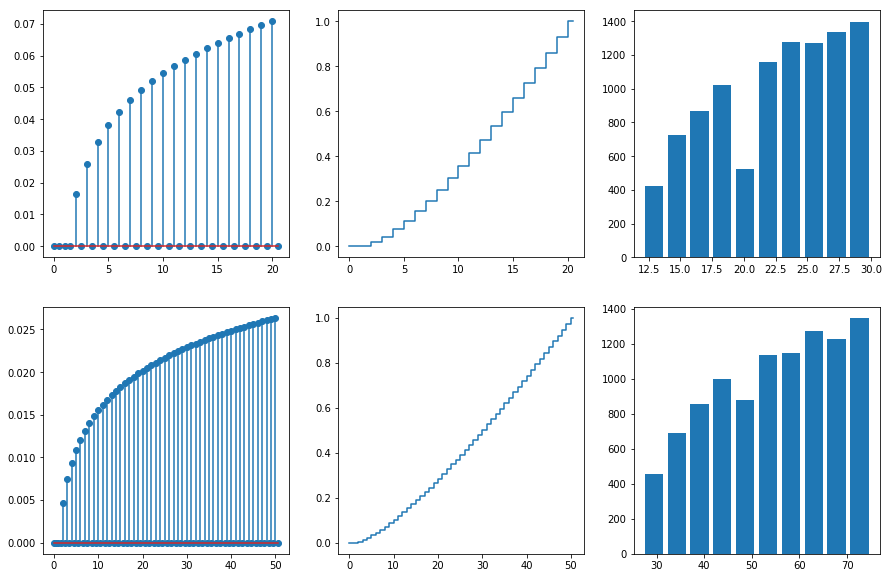

In [27]:
nVals = (10, 25)
plt.subplot(2, 3, 1)


f = plt.gcf()
f.set_size_inches(15, 10)

intg = (i*3 for i in range(1, 3))
x = np.arange(-2, 3, 1)
for i, n in zip(intg, nVals):
    x = np.arange(0, 2*n + 1, 0.5)
    lg = create(n)
    y1 = lg.pmf(x)
    y2 = lg.cdf(x)
    y3 = lg.rvs(n, size=10_000)
    plt.subplot(2, 3, i - 2)
    plt.stem(x, y1)
    plt.subplot(2, 3, i - 1)
    plt.plot(x, y2, drawstyle='steps-post')
    plt.subplot(2, 3, i)
    plt.hist(y3, rwidth=0.8, bins=10)


### Завдання 3
Напишіть функцію для обрахунку теоретичної (через щільність отриманої випадкової величини) імовірності в залежності від параметра $n$.

Виведіть результат для:
- $n = 10$;
- $n = 25$.

In [32]:
def theor(n):
    lg = create(n)
    domain = np.arange(1, 2*n + 1)
    sample = lg.pmf(domain)
    oddProb = sum([sample[i] for i in range(1, len(sample), 2)])
    evenProb = sum([sample[i] for i in range(0, len(sample), 2)])
    return oddProb, evenProb


nVals = (10, 25)
for n in nVals:
    a, b = theor(n)
    print(f"n: {n}, odd number prob: {a}, even number prob: {b}")

n: 10, odd number prob: 0.5205046299279227, even number prob: 0.47949537007207715
n: 25, odd number prob: 0.5073640739858903, even number prob: 0.49263592601410955


### Завдання 4
Напишіть функцію для обрахунку еміричної (симулюванням $1000000$ значень отриманої випадкової величини) імовірності в залежності від параметра $n$.

Виведіть результат для:
- $n = 10$;
- $n = 25$.

In [34]:
def empyric(n, amt):
    lg = create(n)
    y = list(lg.rvs(size=amt))
    evenAmt = sum([1 for i in range(len(y)) if y[i] % 2 == 0])
    oddAmt = sum([1 for i in range(len(y)) if y[i] % 2 == 1])
    return evenAmt/amt, oddAmt/amt
    

for n in (10, 25):
    a, b = empyric(n, 100_000)
    print(f"n: {n}, odd number prob: {a}, even number prob: {b}")


n: 10, odd number prob: 0.52053, even number prob: 0.47947
n: 25, odd number prob: 0.50784, even number prob: 0.49216
